**Introduction**
**Info:** This data set contains information about more than 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue, it consists of 21 columns each represent unique info about the movie as imdb_id, budget, revenue, genres & vote counts.

**Questions for Analysis**

1. What's the most popular genres over years?


2. which genres have the highest average revenue over decades?

In [1]:
#import python necessary packagaes for the analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Data wrangling**

**General data characteristics**

In [2]:
#load the data sheet 
df = pd.read_csv('tmdb-movies.csv')

In [3]:
#print few lines. perfom operations to inspect data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#define the shape of the data set
df.shape

(10866, 21)

Data Assessing

In [5]:
# Display the dataset information (types and look for instances of missing or possibly errant data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
 #Display the number of missing values for each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# Check for duplicated rows:
df.duplicated().sum()

1

In [8]:
#display the duplicated row
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
# display statistical summary of the dataset
df.describe()
# min value is a zero in ('budget','revenue','runtime','budget_adj',revenue_adj) which is treated as nan values as it's irrelevant for our analysis .

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
# displaying 0-valued data shape across our dataset.
zero_data=df[(df.budget == 0)|(df.revenue == 0)|(df.budget_adj == 0)|(df.revenue_adj == 0)]
zero_data.shape

(7011, 21)

In [11]:
# sample of 0-valued parameters in our dataset.
df[(df.budget == 0)].sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4436,79548,tt1838544,1.172885,0,18100189,Gone,Amanda Seyfried|Jennifer Carpenter|Daniel Sunj...,NaN,Heitor Dhalia,No one believes her. Nothing will stop her.,...,"When her sister disappears, Jill is convinced ...",94,Drama|Thriller,Lakeshore Entertainment|Summit Entertainment|S...,2/23/12,208,6.0,2012,0.0,1.719055e+07
6167,10553,tt0089901,0.211695,0,14393902,Remo Williams: The Adventure Begins...,Fred Ward|Joel Grey|Wilford Brimley|J. A. Pres...,http://www.mgm.com/view/Movie/1621/Remo-Willia...,Guy Hamilton,A hero who doesn't exist must save America fro...,...,When a street-smart NYPD cop (Fred Ward) regai...,121,Comedy|Action|Adventure,Orion Pictures,10/11/85,21,5.8,1985,0.0,2.917883e+07
2073,54551,tt1814643,0.635090,0,0,Minions: Banana,Pierre Coffin,NaN,Kyle Balda|Samuel Tourneux,NaN,...,The Minions fight over a delicious banana.. bu...,4,Animation|Comedy|Family,Universal Pictures|Illumination Entertainment,12/13/10,113,7.2,2010,0.0,0.000000e+00
4809,98545,tt1649780,0.123061,0,539896,"Peace, Love & Misunderstanding",Jane Fonda|Catherine Keener|Elizabeth Olsen|Ch...,http://bcdfpictures.com/index.php?projects/pea...,Bruce Beresford,Life is a journey. Family is a trip.,...,A conservative lawyer named Diane takes her tw...,96,Comedy|Drama|Romance,Atlas Film,6/15/12,27,5.4,2012,0.0,5.127631e+05
626,266764,tt2378401,0.014647,0,0,Meet the Patels,Ravi Patel,NaN,Geeta Patel|Ravi Patel,NaN,...,"Finding love is never easy. For Ravi Patel, a ...",88,Documentary,NaN,9/11/15,20,6.7,2015,0.0,0.000000e+00


In [12]:
# data release over time 
df.release_year.value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64

Text(0.5, 0, 'Year')

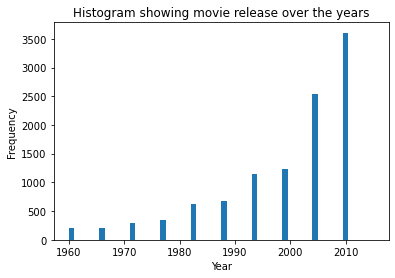

In [13]:
# data release over time 
df.release_year.plot(kind='hist', x="release  year", xlabel='Year', y="distribution", width=1, title='Histogram showing movie release over the years')
plt.xlabel('Year')


In [14]:
#display frequency of genres
df.genres.value_counts().nlargest(10)

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Name: genres, dtype: int64

In [15]:
#dispaly frequency of cast
df.cast.value_counts()

Louis C.K.                                                                        6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei           5
Bill Burr                                                                         4
Aziz Ansari                                                                       3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                  3
                                                                                 ..
Ray Stevenson|Vincent D'Onofrio|Val Kilmer|Christopher Walken|Linda Cardellini    1
Freida Pinto|Riz Ahmed|Roshan Seth|Kalki Koechlin|Anurag Kashyap                  1
William Hurt|Paul Giamatti|James Woods|Billy Crudup|Topher Grace                  1
Dennis Quaid|Tony Oller|Aimee Teegarden|Stephen Lunsford|Devon Werkheiser         1
Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson          1
Name: cast, Length: 10719, dtype: int64

**Data cleaning**

In [16]:
#column labels
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

**Drop irrelevant columns for our current analysis**

In [17]:
df.drop(
    ['homepage','tagline','production_companies','keywords','overview'
     ,'imdb_id','id','release_date'], inplace = True, axis = 1)

In [18]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

**Drop any missing values**

In [19]:
df.dropna(inplace = True)

**Drop rows that contain zero values**

In [20]:
zero_data=df[(df.budget == 0)|(df.revenue == 0)|(df.budget_adj == 0)|(df.revenue_adj == 0)]
df.drop(zero_data.index, inplace=True)

In [21]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [22]:
# info of newly-cleaned data
df.info()
# in this way we've confirmed that our dataset is clean & ready for usuage for furthur analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3850 non-null   float64
 1   budget          3850 non-null   int64  
 2   revenue         3850 non-null   int64  
 3   original_title  3850 non-null   object 
 4   cast            3850 non-null   object 
 5   director        3850 non-null   object 
 6   runtime         3850 non-null   int64  
 7   genres          3850 non-null   object 
 8   vote_count      3850 non-null   int64  
 9   vote_average    3850 non-null   float64
 10  release_year    3850 non-null   int64  
 11  budget_adj      3850 non-null   float64
 12  revenue_adj     3850 non-null   float64
dtypes: float64(4), int64(5), object(4)
memory usage: 421.1+ KB


In [23]:
# sample of our clean dataset
df.sample(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
5010,0.920571,9500000,107071655,The Texas Chainsaw Massacre,Jessica Biel|Jonathan Tucker|Erica Leerhsen|Mi...,Marcus Nispel,98,Horror,333,6.0,2003,1.126085e+07,1.269177e+08
3010,0.634961,30000000,22211426,Doomsday,Rhona Mitra|Bob Hoskins|Malcolm McDowell|Alexa...,Neil Marshall,105,Action|Thriller|Science Fiction,162,5.8,2008,3.038360e+07,2.249544e+07
7886,2.183891,27000000,20158808,The Neverending Story,Barret Oliver|Gerald McRaney|Noah Hathaway|Dru...,Wolfgang Petersen,102,Drama|Family|Fantasy|Adventure,484,6.8,1984,5.667414e+07,4.231419e+07
10331,0.336871,25000000,2438031,Son of the Pink Panther,Roberto Benigni|Herbert Lom|Claudia Cardinale|...,Blake Edwards,93,Comedy|Foreign,15,4.0,1993,3.773675e+07,3.680135e+06
6258,0.948170,30000000,58405313,Must Love Dogs,Diane Lane|John Cusack|Elizabeth Perkins|Chris...,Gary David Goldberg,98,Comedy|Romance,80,6.0,2005,3.349690e+07,6.521323e+07


In [24]:
# Descriptive statistics of our cleaned dataset
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3850.000000,3.850000e+03,3.850000e+03,3850.000000,3850.000000,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,1.192778,3.724698e+07,1.077871e+08,109.212987,528.278442,6.168390,2001.260519,4.428989e+07,1.371959e+08
std,1.475462,4.221167e+07,1.766030e+08,19.913488,880.245090,0.794817,11.285056,4.480837e+07,2.161848e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.463380,1.000000e+07,1.363273e+07,95.000000,71.000000,5.700000,1995.000000,1.317218e+07,1.841498e+07
50%,0.798343,2.400000e+07,4.488472e+07,106.000000,204.500000,6.200000,2004.000000,3.004524e+07,6.179073e+07
75%,1.372826,5.000000e+07,1.242969e+08,119.000000,580.750000,6.700000,2010.000000,6.072867e+07,1.633775e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


**Sorting data release data into decades for Exploratory analysis by using pd.cut() function**

In [25]:
bins_edges=[1960,1970,1980,1990,2000,2010,2015]
bins_names=['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
df.release_year = pd.cut(df.release_year, bins_edges, labels=bins_names)

In [26]:
#get the values of each bins
df.release_year.value_counts()

2000s    1530
2010s     861
1990s     808
1980s     424
1970s     145
1960s      77
Name: release_year, dtype: int64

**Seperate Data contained in Cast & Genres into Multiple values**

In [27]:
# Columns like cast & genres contain several values contained in a single cell separated by the "|" ,
# so we need to separate these values to make a more appropriate analysis.
def seprate_values(col):
    new_cols=(df[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
    return new_cols


In [28]:
df_gen = seprate_values('genres')
df_cast = seprate_values('cast')
df['cast'],df['genres']=df_cast['cast_1'],df_gen['genres_1']

In [29]:
# display frequency of our Movie cast.
df.cast.value_counts().nlargest(10)

Nicolas Cage             37
Bruce Willis             32
Johnny Depp              30
Sylvester Stallone       29
Robert De Niro           28
Denzel Washington        28
Tom Hanks                28
Tom Cruise               27
Arnold Schwarzenegger    26
Adam Sandler             24
Name: cast, dtype: int64

In [30]:
# display frequency of our Movie genres
df.genres.value_counts().nlargest(10)

Drama              889
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              172
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Name: genres, dtype: int64

**Exploratory Data Analysis¶**

**Research Question 1 ( What's the most popular genres over years? )**

In [31]:

df.groupby(["release_year","genres"])['popularity'].size().unstack()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1960s,12,15,1,10,6,0,18,1,0,2,3,2,1,0,1,0,0,1,4
1970s,28,15,2,18,12,0,34,1,2,0,18,2,2,1,7,0,2,0,1
1980s,73,51,5,83,17,2,71,4,21,0,52,4,1,4,20,0,13,3,0
1990s,159,53,16,174,43,2,184,7,29,4,52,5,9,19,18,1,31,1,1
2000s,269,128,44,351,58,19,368,16,40,4,94,9,15,23,25,0,53,7,7
2010s,146,52,35,149,36,5,213,11,18,7,56,7,8,19,27,0,61,8,3


Text(0.5, 1.0, 'A graph showing the popularity of movie genres over years')

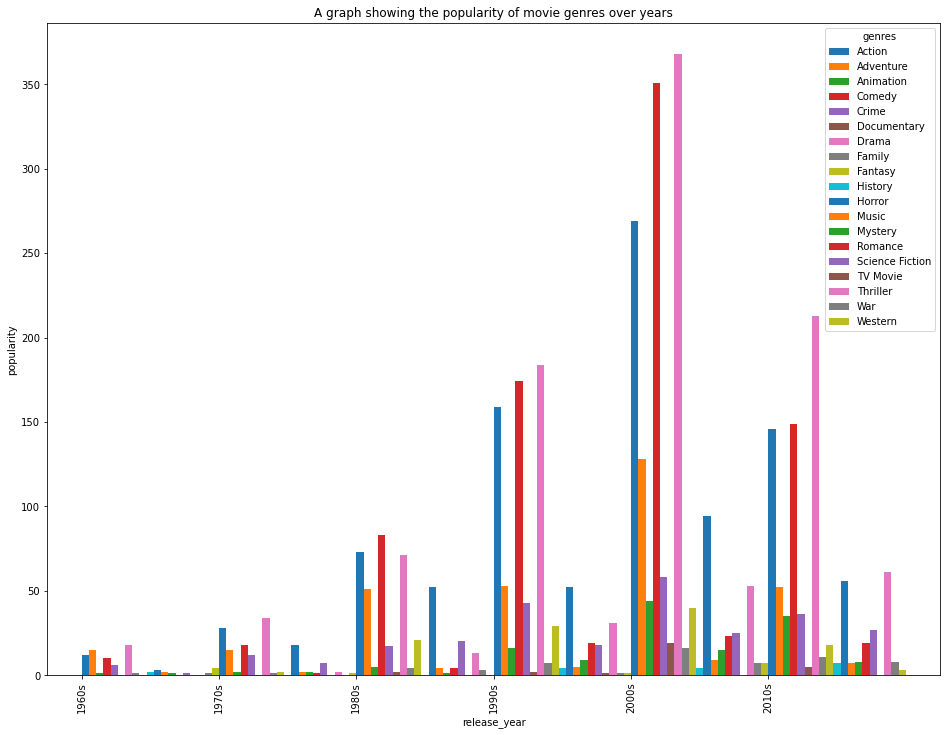

In [32]:
fig, ax = plt.subplots()
df.groupby(['release_year', 'genres'])['popularity'].size().unstack().plot(kind = "bar",figsize=(16,12), ax=ax, width=1, align='edge')
ax.set_ylabel('popularity');
ax.set_title('A graph showing the popularity of movie genres over years')

**This clarifys the most popular genres over the years**

**This question has shown that The Most Popular Genres differed a lot according to the respective decade as well as The Top Three Genres for each decade are:

1960s: Adventure, Action, Comdey.

1970s: Drama, Action, Horror, comdey.

1980s: Comdey, Drama, Action.

1990s: Drama, Comdey, Action.

2000s: Drama, Comdey, Action.

2010s: Drama, Comdey, Action.**

**Research Question 2 ( Which Genres have The Highest average Revenue over Decades? )**

In [33]:
pivot = np.round(pd.pivot_table(df, values='revenue_adj', 
                                index='release_year', 
                                columns='genres', 
                                aggfunc=np.mean),2)
pivot

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1960s,2.731441e+08,3.839599e+08,3.126928e+08,2.481140e+08,1.386940e+08,NaN,2.861995e+08,1.345551e+09,NaN,3.870526e+08,1.017132e+08,3.226543e+08,8.733419e+07,NaN,3.555466e+08,NaN,NaN,6.895860e+07,1.230217e+08
1970s,1.721027e+08,5.681115e+08,9.490723e+07,2.467087e+08,1.335606e+08,NaN,2.791437e+08,2.154078e+07,1.578399e+08,NaN,2.555789e+08,4.563258e+08,5.060207e+07,1.557275e+08,2.671283e+08,NaN,7.168150e+07,NaN,4.179465e+07
1980s,1.140504e+08,2.278103e+08,1.472569e+08,1.117692e+08,5.620388e+07,8379384.44,1.264792e+08,1.223186e+08,2.143721e+08,NaN,6.363549e+07,3.549937e+07,1.847564e+07,2.170476e+08,1.905288e+08,NaN,7.440646e+07,4.775132e+07,NaN
1990s,1.544116e+08,2.703597e+08,2.553253e+08,1.126970e+08,1.559189e+08,46513660.82,1.087436e+08,4.013539e+08,1.340855e+08,1.953159e+08,6.118956e+07,1.213227e+08,1.420341e+08,1.650789e+08,1.668681e+08,58389103.04,1.008899e+08,2.146450e+07,2.473345e+08
2000s,1.320168e+08,3.114351e+08,3.171352e+08,8.824594e+07,6.920403e+07,23925937.76,7.178821e+07,2.278512e+08,2.196253e+08,2.142948e+08,7.662876e+07,1.038387e+08,7.809762e+07,8.806658e+07,1.586893e+08,NaN,1.202866e+08,1.459111e+08,8.272509e+07
2010s,2.404300e+08,2.964165e+08,3.202405e+08,8.157684e+07,7.558890e+07,31800002.02,5.005509e+07,2.365620e+08,2.158465e+08,6.351185e+07,5.468618e+07,6.963768e+07,6.160622e+07,1.061665e+08,3.065125e+08,NaN,6.493511e+07,1.945616e+08,1.641861e+08


<AxesSubplot:title={'center':'Which Genres have The Highest average Revenue over Decades'}, xlabel='release_year', ylabel='Revenue'>

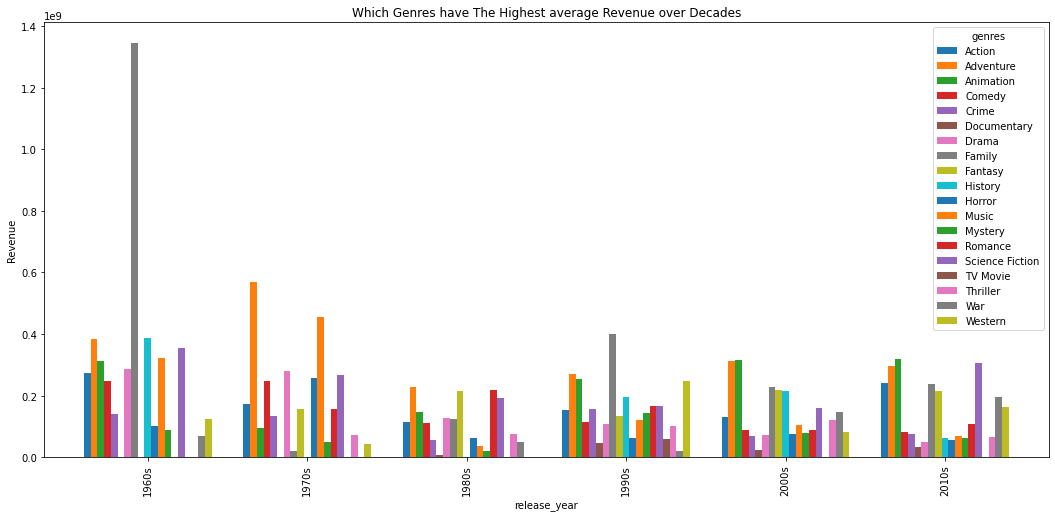

In [34]:
np.round(pd.pivot_table(df, values='revenue_adj', 
                                index=['release_year'], 
                                columns=['genres'], 
                                aggfunc=np.mean,
                                fill_value=0),2).plot.bar(width=.8, figsize=(18,8),
                                                          title='Which Genres have The Highest average Revenue over Decades', ylabel='Revenue')

This question's clarified The Highest Grossing Revenue for each decade:

1960s: Adventure, Animation, Action.

1970s: Adventure, Music, Drama.

1980s: Adventure, Romance, Fantasy.

1990s: Family, Adventure, Western, Animation.

2000s: Animation, Adventure, Family.

2010s: Animation, science fiction, Adventure.

**Conclusions**

Although our dataset contains more than 10,000 rows it's pretty insufficient to draw precise conclusions :

Most of the data columns are irrelevant for the analysis

 many NAN values are missing from our dataset for an uncertain reason (We should try a better web scrapping for a better data quality or prepare data from a different source).

most of the remaining data are 0-valued treated as missing, so the data after cleaning is pretty insufficient.

The data is outdated it may be good to draw some conclusions if we had better data quality, but a lot of changes has occured in the past couple of years that made a huge impact on the Cinema industry such as the streaming services such as Netflix, HBO or Disney plus or the recent global pandemic.

**Conclusive Insights from our Analysis based on our cleaned data**

From the data exploration phase, we can be able to deduce that action movie was the most popular over the decades as it appeared top three in all the years.
While Adventure movie had the highest average revenue over the decades as it appeared in top three in all the years.

**THANK YOU**